### Task-I:

**dataset: https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset**

1. Load the data: "ai4i2020.csv"
2. Profiling of the data.
3. Write your analysis of the data.
4. If there are NAN vals, Imputation to be done.
5. If the data ain't normal, then handle it.
6. Check multicollinearity.
7. Build the model and save it. (Regress against Air tempearature)
8. Compute Model accuracy.
9. 10 test cases and create a final report.

### Task-II:

**Note:** We gotta regress against the Air temperature i.e. Air temperature is our label column.

i. Redo the task-I with new things learnt.<br>
ii. A button to be added to display(not generate) the pandas profiling report.<br>
iii. Deploy the model on Heroku.<br>

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import os
import logging as lg

import seaborn as sns
from plotly.offline import iplot 
import cufflinks as cf

In [2]:
cf.go_offline()

In [3]:
pwd

'D:\\iNeuron\\12. Machine Learning'

In [4]:
os.chdir("files used or created in the process")

In [5]:
os.listdir()

['Admission_Prediction.csv',
 'admission_prediction_model.sav',
 'advertising.csv',
 'Advertizing_report.html',
 'ai4i2020.csv',
 'ai4i2020.log',
 'ai4i__test_cases.csv',
 'Boxcoxed_ai4i.csv',
 'myfirstmodel.sav',
 'predictive_maintenance.sav',
 'predictive_maintenance_report.html',
 'standardized_ai4i.csv']

In [6]:
### 1. Loading the data:

df = pd.read_csv("ai4i2020.csv")
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [7]:
try:
    df.rename(columns = {'UDI': 'UID'}, inplace=True)
    df.set_index('UID', inplace=True)

except Exception as e:
    print(e)

In [8]:
df.head()

Product ID Type  Air temperature [K]  Process temperature [K]  \
UID                                                                 
1       M14860    M                298.1                    308.6   
2       L47181    L                298.2                    308.7   
3       L47182    L                298.1                    308.5   
4       L47183    L                298.2                    308.6   
5       L47184    L                298.2                    308.7   

     Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
UID                                                                          
1                      1551         42.8                0                0   
2                      1408         46.3                3                0   
3                      1498         49.4                5                0   
4                      1433         39.5                7                0   
5                      1408         40.0                9                0   

     TWF  HDF  PWF  OSF  RNF  
UID                           
1      0    0    0    0    0  
2      0    0    0    0    0  
3      0    0    0    0    0  
4      0    0    0    0    0  
5      0    0    0    0    0

In [9]:
### 2. Profiling the data:

pf_report = ProfileReport(df)

In [10]:
## saving the report genrated locally:

pf_report.to_file("predictive_maintenance_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
pf_report.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### 3. Write your analysis of the data in english.

1. - We have to regress all suitable feature columns against the Air Temperature.
   - There's not a single record containing NaN vals.
   - Decent dataset, as we're having 10,000 records.
   - Each record is an unique one since there are no duplicate rows.
<br><br>
2. - UID, Product ID and Type features won't affect or do the model any good, thus at the time of model building they should be dropped without giving a second thought.
<br><br>
3. - Air Temperature and Process Temperature somewhat follows normal distribution.
   - The distribution of Rotational speed is right skewed i.e. most of its vals falls right to the peak of the graph, can be perfectly handled by the box-cox transformation.
   - The Torque feature does follow the Normal distribution.
   - Tool Wear doesn't follow normal distribution, I'll try to make it do that using box-cox tranformation.
<br><br>
4. Correlations: (i.e. if one entity increases, the other one increases or decreases accordingly.)<br>
    **{Essentially from the Pearsons' correlation plot}**
    - Air temp. and Process temp. are positively correlated, demonstrated by the report.
    - Change in Air temp. doesn't have any effect on rotational speed and Torque whatsoever.
    - Process temp. is not at all correlated with rotational speed and torque.
    - Rotational speed is negatively correlated with Torque and vice-versa.
    - Machine failure is positively correlated w HDF, PWF and OSF.
    - HDF (Heat Dissipation Failure) is positively correlated with Machine Failure.
    - PWF (Power failure) is positively correlated with Machine failure.
    - OSF (Overstrain failure) is positively correlated with Machine failure.
    <br>**Note: As mentioned in the dataset description that if at least one of the these: TWF, HDF, PWF OSF and RNF failure modes is true, the process fails and the 'machine failure' label is set to 1. 
       It is thus, therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail.**

### 4. If there are NAN vals, Imputation to be done:

**__>** As there isn't even a single NaN val in the whole dataset, Imputation needn't be done.

In [12]:
df.head()

Product ID Type  Air temperature [K]  Process temperature [K]  \
UID                                                                 
1       M14860    M                298.1                    308.6   
2       L47181    L                298.2                    308.7   
3       L47182    L                298.1                    308.5   
4       L47183    L                298.2                    308.6   
5       L47184    L                298.2                    308.7   

     Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
UID                                                                          
1                      1551         42.8                0                0   
2                      1408         46.3                3                0   
3                      1498         49.4                5                0   
4                      1433         39.5                7                0   
5                      1408         40.0                9                0   

     TWF  HDF  PWF  OSF  RNF  
UID                           
1      0    0    0    0    0  
2      0    0    0    0    0  
3      0    0    0    0    0  
4      0    0    0    0    0  
5      0    0    0    0    0

### Splitting our data in features and label:

In [13]:
# feature columns
X = df.reset_index(drop=True).drop(columns=['Product ID', 'Type', 'Air temperature [K]'])

# label column, i.e. to be regressed against
Y = df.reset_index(drop=True)[['Air temperature [K]']]

In [14]:
X.head()

Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  \
0                    308.6                    1551         42.8   
1                    308.7                    1408         46.3   
2                    308.5                    1498         49.4   
3                    308.6                    1433         39.5   
4                    308.7                    1408         40.0   

   Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  
0                0                0    0    0    0    0    0  
1                3                0    0    0    0    0    0  
2                5                0    0    0    0    0    0  
3                7                0    0    0    0    0    0  
4                9                0    0    0    0    0    0

In [15]:
Y.head()

Air temperature [K]
0                298.1
1                298.2
2                298.1
3                298.2
4                298.2

### 5. If the data isn't normal, then handle it.

**Refer: https://www.geeksforgeeks.org/box-cox-transformation-using-python/**

As per my understanding, we are obliged to convert the non-normal columns into normal distribution for better model optimization and we can very well do that by **Box-Cox Transform**.

In [123]:
X1 = X.iloc[:, 0:4]
X1.head()

Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  \
0                    308.6                    1551         42.8   
1                    308.7                    1408         46.3   
2                    308.5                    1498         49.4   
3                    308.6                    1433         39.5   
4                    308.7                    1408         40.0   

   Tool wear [min]  
0                0  
1                3  
2                5  
3                7  
4                9

In [130]:
X1_rot = X1['Rotational speed [rpm]']**3
X1_rot

0       3731087151
1       2791309312
2       3361517992
3       2942649737
4       2791309312
           ...    
9995    4126796864
9996    4346707968
9997    4451411125
9998    2791309312
9999    3375000000
Name: Rotational speed [rpm], Length: 10000, dtype: int64

C:\Program Files\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Density'>

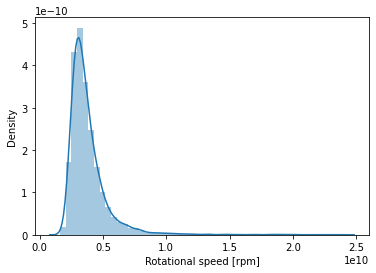

In [131]:
sns.distplot(X1_rot)

In [124]:
X1.iplot(kind='hist', subplots=True)

### StandardScaler()

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X2 = scaler.fit_transform(X_)

X2 = pd.DataFrame(X2)

X2.columns = X1.columns

X2.head()

Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  \
0                -0.947360                0.068185     0.282200   
1                -0.879959               -0.729472     0.633308   
2                -1.014761               -0.227450     0.944290   
3                -0.947360               -0.590021    -0.048845   
4                -0.879959               -0.729472     0.001313   

   Tool wear [min]  
0        -1.695984  
1        -1.648852  
2        -1.617430  
3        -1.586009  
4        -1.554588

In [23]:
X2.iplot(kind='hist', subplots=True)

### Robust Scaler():

In [24]:
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()
X3 = r_scaler.fit_transform(X_)
X3 = pd.DataFrame(X3)
X3.columns = X1.columns
X3.head()

Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  \
0                -0.652174                0.253968     0.198529   
1                -0.608696               -0.502646     0.455882   
2                -0.695652               -0.026455     0.683824   
3                -0.652174               -0.370370    -0.044118   
4                -0.608696               -0.502646    -0.007353   

   Tool wear [min]  
0        -0.990826  
1        -0.963303  
2        -0.944954  
3        -0.926606  
4        -0.908257

In [25]:
X3.iplot(kind='hist', subplots=True)

### Logarithmic:

In [26]:
X4 = np.log(X1)
X4.head()

C:\Program Files\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning:

divide by zero encountered in log



Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  \
0                 5.732046                7.346655     3.756538   
1                 5.732370                7.249926     3.835142   
2                 5.731722                7.311886     3.899950   
3                 5.732046                7.267525     3.676301   
4                 5.732370                7.249926     3.688879   

   Tool wear [min]  
0             -inf  
1         1.098612  
2         1.609438  
3         1.945910  
4         2.197225

In [27]:
X4.iplot(kind='hist', subplots=True)

In [33]:
X4['Tool wear [min]']

0           -inf
1       1.098612
2       1.609438
3       1.945910
4       2.197225
          ...   
9995    2.639057
9996    2.833213
9997    3.091042
9998    3.218876
9999    3.401197
Name: Tool wear [min], Length: 10000, dtype: float64

In [40]:
X4_toolwear = normalize(X4['Tool wear [min]'])
X4_toolwear = pd.DataFrame(X4_toolwear)
X4_toolwear.columns = X4[['Tool wear [min]']].columns
X4_toolwear

Data must be positive.


Tool wear [min]
0           46.314973
1            0.110020
2            1.138075
3            2.373047
4            3.671860
...               ...
9995         6.914439
9996         8.790377
9997        11.770106
9998        13.471841
9999        16.176448

[10000 rows x 1 columns]

C:\Program Files\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

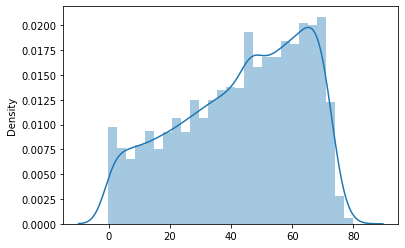

In [58]:
# X4_toolwear.iplot(kind='hist', subplots=True)
sns.distplot(X4_toolwear)

### Reciprocal:

In [28]:
X5 = 1/X1
X5.head()

Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  \
0                 0.003240                0.000645     0.023364   
1                 0.003239                0.000710     0.021598   
2                 0.003241                0.000668     0.020243   
3                 0.003240                0.000698     0.025316   
4                 0.003239                0.000710     0.025000   

   Tool wear [min]  
0              inf  
1         0.333333  
2         0.200000  
3         0.142857  
4         0.111111

In [29]:
X5.iplot(kind='hist', subplots=True)

It's pretty much obvious that we need to transform the non-normal features viz. `Rotational speed [rpm]` and `Tool wear` into normal distributions using box-cox transformation.

**NOTE:** Since inside the Box-cox transformation, logarithm of the data is essentially taken; it's important to keep in mind that our data doesn't contain any non-postive values including zero. I'd take care of it beforehand or will use the exception handling.

**__>** If I find any non-positive vals, I'll replace them by the median of that very column.

In [48]:
from scipy import stats
    
def normalize(data):
    """
    This function normalizes the argumented data using Box-cox transformation and since box-cox transformation 
    internally essentially takes the logarithm of the data, so this function will take care of any non-positive
    values and replace them by the median of that very data.
    """
    try:
        data_normal, lamb = stats.boxcox(data)
        return data_normal
    
    except ValueError as ve:
        print(ve)
        # replacing all the non-positive values by the median of that very column
        data_ = data.mask(data<=0, data.median())
        return normalize(data_)
    
    except Exception as e:
        print(e)

In [49]:
rotational_speed_normal = normalize(X['Rotational speed [rpm]'])
rotational_speed_normal

array([0.31621449, 0.31621449, 0.31621449, ..., 0.31621449, 0.31621449,
       0.31621449])

In [50]:
## Let's have a look at its distribution now

pd.DataFrame(rotational_speed_normal).iplot(kind='hist')

# __> normal distribution in its entirety!

In [51]:
tool_wear_normal = normalize(X['Tool wear [min]'])
tool_wear_normal

Data must be positive.


array([37.80012275,  1.66474   ,  3.00916627, ..., 11.24953161,
       12.45313782, 14.37045058])

C:\Program Files\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Program Files\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Tool wear [min]', ylabel='Density'>

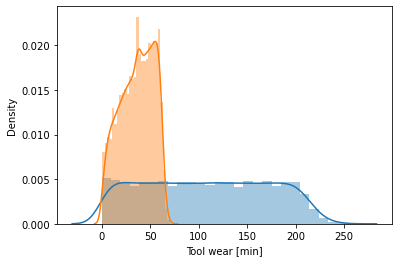

In [52]:
sns.distplot(X['Tool wear [min]']) # before conversion
sns.distplot(tool_wear_normal) # after the conversion

**__>** I assume we're good to go with this conversion.

At last, all non-normal data is handled.

**NOTE:** I will redo this while creating a class in forthcoming cells, that is to say I will have my class to have the utility (or method) to do to transform the data using Box-cox trsansformation so that my class can be more genric. 

### 6. Check Multicollinearity

**Feature columns:** Process temperature, Rotational speed, Torque, Tool wear, Machine failure, TWF, PWF, OSF, RNF.

In [ ]:
X.head()

- **Multicollinearity is a term which refers to the correlation between the feature and feature at the hand.**
<br><br>
- **If it falls in the range greater than equal to `0.9` and less than equal to `0.9`, then that to prevent our model to make any bias, we gotta drop that column.**<br><br>
- **And the same goes if VIF (Variance Inflation factor) turns outta equal to or more than 10.**

In [ ]:
X.corr()

**From our analysis of the profiling report, we can conclude that, there is multicollineariy between the following feature columns:**

- Rotational speed and Torque **(negative correlation).**
- Machine failure and TWF **(positive correlation)**.
- Machine failure and HDF **(positive correlation)**.
- Machine failure and PWF **(positive correlation)**.
- Machine failure and OSF **(positive correlation)**.
- Machine failure and RNF **(positive correlation)**.

**However, let's take a closer look from the numerical perspective..**

In [ ]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns

fig = mp.figure() 

# Figure size
fig.set_size_inches(12, 12)

# plotting correlation heatmap
sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

### __> So from the above `Corr plot` we can confirm that there's no need to drop any feature column as correlation between no features is as strong as to have >= +0.9 or < = -0.9 value.

### 7. Build the model and save it. (Regress against the Air temperature)

Since we have to regress against the Air temperature (our response column or label column) against not one but various explanatory variables, we have to use the **Multiple Linear Regression** (that is just an extension of linear regression to several explanatory variables).

**Rough Idea:**
- discern features and label
- normalize the features
- standardize the features (they all ought to be on the same scale for better model optimization)
- split the data into train and test subparts.

**Note:** From our aforedone analysis, we do know that `Machine failure` is highly postively correlated with `TWF`, `HDF`, `PWF`, `OSF`, `RNF`.<br>
And it's even emphasized in the dataset description itself if one of the failures from TWF, HDF, PWF, OSF and RNF is true Machine failure is set to 1.<br>
<br>
Thus I'll put a condition in the predict method of the class LModel that if atleast one of the afore-mentioned failures is true, then set Machine failure to 1 i.e. the class LModel's **predict() method** won't be accepting Machine failure feature values.

In [71]:
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV

import pickle
import logging as lg

In [72]:
class Log:
    def __init__(self):
        try:
            self.logFile="ai4i2020.log"
            
            # removing the log file if already exists so as not to congest it.
            if os.path.exists(self.logFile):
                os.remove(self.logFile)
            lg.basicConfig(filename=self.logFile, level=lg.INFO, format="%(asctime)s %(levelname)s %(message)s")
            
            # Adding the StreamHandler to record logs in the console.
            self.console_log = lg.StreamHandler()
            
            # setting level to the console log.
            self.console_log.setLevel(lg.INFO) 
            
            # defining format for the console log.
            self.format = lg.Formatter("%(levelname)s %(asctime)s %(message)s")
            self.console_log.setFormatter(self.format) 
            
            # adding handler to the console log.
            lg.getLogger('').addHandler(self.console_log) 
        
        except Exception as e:
            lg.info(e)
            
        else:
            lg.info("Log Class successfully executed!")

In [118]:
class LModel:
    """
    This is a class that is specific to build a regression model to regress against the label column 'Air Temperature [K]'
    """

    def __init__(self):

        self.X = None
        self.Y = None
        self.X_train = None
        self.X_test = None
        self.Y_train = None
        self.Y_test = None

        self.scaler = StandardScaler()  # an object of StandardScaler()

        self.lModel = None
        self.l1Model = None
        self.l2Model = None
        self.elasticModel = None
        
        lg.info("Model building initiates..")

    def _normalize(self, data):
        """
        This method normalizes the argumented data using Box-cox transformation and since box-cox transformation
        internally essentially takes the logarithm of the data, so this function will take care of any non-positive
        values and replace them by the median of that very data.
        """
        try:
            data_normal, lamb = stats.boxcox(data)
            return data_normal

        except ValueError as ve:
            # replacing all the non-positive values by the median of that very column
            data_ = data.mask(data <= 0, data.median())
            return self._normalize(data_)

        except Exception as e:
            lg.error("LModel._normalize()", e)
#             data_ = data.mask(data <= 0, data.median())
#             return self._normalize(data_)

    def _standardize(self, data):
        """
        This method standardizes the data without changing its meaning per se, so as to increase the model optimization.
        """
        try:
            return self.scaler.fit_transform(data)

        except Exception as e:
            lg.error("LModel._standardize()", e)

    def _features(self):
        """
        A protected method specific to pick the feature columns from the datset.
        """
        try:
            self.X = df.reset_index(drop=True).drop(columns=['Product ID', 'Type', 'Air temperature [K]'])

            """
            since we know from our above analysis, 'Rotational speed [rpm]' and 'Tool wear [min]'
            are not normal so it's better if we normalize them here only.
            """
            self.X['Rotational speed [rpm]'] = self._normalize(self.X['Rotational speed [rpm]'])
            self.X['Tool wear [min]'] = self._normalize(self.X['Tool wear [min]'])

            return self.X

        except Exception as e:
            lg.error("LModel._features()", e)

    def _label(self):
        """
        A protected method specific to select the label column that is to be regressed against.
        """
        try:
            self.Y = df.reset_index(drop=True)[['Air temperature [K]']]
            return self.Y

        except Exception as e:
            lg.error("LModel._label()", e)

    def _split(self):
        try:

            # standardizing the features before splitting
            X_ = self._standardize(self._features())
            self._label()

            # splitting the data into train and test sub-data
            self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(X_, self.Y, test_size=0.25, random_state=100)

        except Exception as e:
            lg.error("LModel._split()", e)

    def build(self):
        """
        A method specific to build the desired model.
        """
        try:
            self._split()  # so that our test and train datasets are ready to be fed

            self.lModel = LinearRegression()

            lg.info("readying the model..")
            self.lModel.fit(self.X_train, self.Y_train)
            lg.info("Model executed succesfully!")

        except Exception as e:
            lg.error("LModel.build()", e)

    def predict_(self, process_t, rot_speed, torque, tool_wear, machine_failure, twf, hdf, pwf, osf, rnf):
        """
        A method specific to yield prediction results.

        Note: If even one of the twf, hdf, pwf, osf and rnf failures is true, then Machine failure will be set to 1.
              For further clarification, refer to the dataset desrciption.

        However, whatever we made happen to the test data, the same's gotta be done for the input to yield accurate
        prediction outcome that is to say the standardization.
        """
        try:
            # correcting machine_failure if the need arises
            machine_failure = 0
            failures = [twf, hdf, pwf, osf, rnf]
            for i in failures:
                if i == 1:  # i.e if any of these failures become true
                    machine_failure = 1  # set the machine failure = true
                    break

            # converting the arguments into array so that they can be fed into model
            test_input = np.array([process_t, rot_speed, torque, tool_wear, machine_failure, twf, hdf, pwf, osf, rnf])
            
            # standardize
            std_test_input = self.scaler.transform(test_input.reshape(1, -1))

            lg.info("Our Model predicts the value of Air temperature to be: (in Kelvins)")
            return float(self.lModel.predict(std_test_input))

        except Exception as e:
            lg.error("LModel().predict()", e)
            
    def buildLasso(self):
        try:
            self._split()
            
            # cross validation to compute the best value of alpha
            lassocv = LassoCV(alphas=None, cv=10, max_iter=1000, normalize=True)
            lassocv.fit(self.X_train, self.Y_train)
            
            lg.info("readying the L1 Model...")
            self.l1Model = Lasso(lassocv.alpha_)
            self.l1Model.fit(self.X_train, self.Y_train)
            lg.info("L1 Model executed!")
        
        except Exception as e:
            lg.error(e)
            
    def buildRidge(self):
        try:
            self._split()
            
            # cross validation to compute the best value of alpha
            ridgecv = RidgeCV(cv=10)
            ridgecv.fit(self.X_train, self.Y_train)
            
            lg.info("readying the L2 Model...")
            self.l2Model = Ridge(ridgecv.alpha_)
            self.l2Model.fit(self.X_train, self.Y_train)
            lg.info("L2 Model executed!")
                    
        except Exception as e:
            lg.error(e)
            
    def buildElasticNet(self):
        try:
            self._split()
            
            # cross validation to compute the best value of alpha
            en_cv = RidgeCV(cv=10)
            en_cv.fit(self.X_train, self.Y_train)
            
            lg.info("readying the L2 Model...")
            self.elasticModel = Ridge(en_cv.alpha_)
            self.l2Model.fit(self.X_train, self.Y_train)
            lg.info("L2 Model executed!")
            
            pass
        
        except Exception as e:
            lg.error(e)

    def accuracy(self, mode='Reg'):
        """
        This method calculates the accuracy of the built model based on the `Adjusted R-squared`.
        """
        try:
            if mode=='Elastic':
                r_sq=self.elasticModel.score(self.X_test, self.Y_test) * 100
            
            elif mode=='L1':
                r_sq=self.l1Model.score(self.X_test, self.Y_test) * 100

            elif mode=='L2':
                r_sq=self.l2Model.score(self.X_test, self.Y_test) * 100
             
            else:
                r_sq=self.lModel.score(self.X_test, self.Y_test) * 100
            
            n=self.X_test.shape[0]               # number of rows
            p=self.X_test.shape[1]               # number of predictors
            accuracy_=1-(1 - r_sq)*(n-1)/(n-p-1) # adjusted r-squared

            lg.info(f"The {mode} regression model appears to be {accuracy_}% accurate.")
            return f"The {mode} regression model appears to be {round(accuracy_, 3)} % accurate."
                

        except Exception as e:
            lg.error("LModel.accuracy()", e)

    def save(self):
        """
        The method to save the model locally.
        """
        try:
            pickle.dump(self.lModel, open("predictive_maintenance.sav", 'wb'))
            lg.info(f"The model is saved at {os.getcwd()} sucessfully!")

        except Exception as e:

            lg.error("LModel.save()", e)

In [119]:
Log()
lm = LModel()
lm

INFO 2022-08-31 13:26:23,486 [WinError 32] The process cannot access the file because it is being used by another process: 'ai4i2020.log'
INFO 2022-08-31 13:26:23,496 Model building initiates..


In [120]:
lm.build()
lm.accuracy(mode="Reg")

INFO 2022-08-31 13:26:24,651 readying the model..
INFO 2022-08-31 13:26:24,667 Model executed succesfully!
INFO 2022-08-31 13:26:24,674 The Reg regression model appears to be 79.97010409990094% accurate.


'The Reg regression model appears to be 79.97 % accurate.'

In [121]:
lm.buildLasso()
lm.accuracy(mode="L1")

C:\Program Files\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Program Files\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 

INFO 2022-08-31 13:26:27,628 readying the L1 Model...

'The L1 regression model appears to be 79.971 % accurate.'

In [122]:
lm.buildRidge()
lm.accuracy('L2')

INFO 2022-08-31 13:26:43,120 readying the L2 Model...
INFO 2022-08-31 13:26:43,127 L2 Model executed!
INFO 2022-08-31 13:26:43,133 The L2 regression model appears to be 79.96611331023423% accurate.


'The L2 regression model appears to be 79.966 % accurate.'

In [81]:
lm.save()

INFO 2022-08-31 13:05:15,345 The model is saved at D:\iNeuron\12. Machine Learning\files used or created in the process sucessfully!


In [152]:
df.tail()

Product ID Type  Air temperature [K]  Process temperature [K]  \
UID                                                                   
9996      M24855    M                298.8                    308.4   
9997      H39410    H                298.9                    308.4   
9998      M24857    M                299.0                    308.6   
9999      H39412    H                299.0                    308.7   
10000     M24859    M                299.0                    308.7   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
UID                                                                            
9996                     1604         29.5               14                0   
9997                     1632         31.8               17                0   
9998                     1645         33.4               22                0   
9999                     1408         48.5               25                0   
10000                    1500         40.2               30                0   

       TWF  HDF  PWF  OSF  RNF  
UID                             
9996     0    0    0    0    0  
9997     0    0    0    0    0  
9998     0    0    0    0    0  
9999     0    0    0    0    0  
10000    0    0    0    0    0

In [154]:
lm.predict_(308.7,1500,40.2,30,0,0,0,0,0,0)

C:\Program Files\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

INFO 2022-08-31 09:43:41,253 Our Model predicts the value of Air temperature to be: (in Kelvins)


4241092641923.049

### 8. Compute the Model Accuracy 

In [93]:
lm.accuracy()

INFO 2022-08-31 08:22:19,305 The model appears to be 79.9589118699432% accurate.


'The model appears to be 79.959 % accurate.'

### 9. 10 test cases and create a final report.

In [129]:
# dataframe report for 10 test cases:

repo = df.iloc[:,3:][0:0].reset_index(drop=True)
repo

Empty DataFrame
Columns: [Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure, TWF, HDF, PWF, OSF, RNF]
Index: []

Here I'll generate those 10 test cases in an automated way by using **np.random.randint(df[column].min(), df[column].max()+1)**.<br><br>
In layman terms, I'm generating random datapoints of a specific column by picking the random values (using np.random.randint()) from between it's minimum and maximum values.

In [131]:
def generateAndMap(column, n=10):
    """
    This function generates random datapoints of a specific column of df by picking the random values 
    (using np.random.randint()) from between it's minimum and maximum values.
    And further map those datapoints to the same column of test cases report "repo".
    
    By default 10 number of datapoints will be generated.
    """
    l = []
    for i in range(n):
        x = np.random.randint(df[column].min(), df[column].max()+1)
        l.append(x)
    
    repo[column] = pd.Series(l)

In [132]:
df.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [133]:
for i in df.columns[3:]: # picking only the desired feature columns from df
    generateAndMap(i)

In [134]:
repo # (not yet containing the predicted values)

Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  \
0                      307                    1314           68   
1                      307                    2347           34   
2                      308                    1933           54   
3                      313                    2509           39   
4                      307                    1478           15   
5                      307                    2059           42   
6                      312                    2755           54   
7                      306                    1232           35   
8                      312                    2020           31   
9                      313                    2583           14   

   Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  
0               79                1    1    0    1    1    1  
1              222                1    0    0    0    0    0  
2               51                1    1    1    0    1    1  
3              131                0    0    1    1    1    0  
4                6                0    0    1    1    0    1  
5              169                0    1    0    0    0    0  
6               22                0    1    0    0    1    1  
7              127                1    1    0    0    1    1  
8               49                1    0    0    0    0    0  
9              158                0    0    1    1    1    1

In [135]:
# let's now add the column containing predicted values of the Air temperatures.

In [143]:
predicted_vals = []
for i in range(10):
    predicted_vals.append( lm.predict_(repo['Process temperature [K]'].iloc[i], 
                                        repo['Rotational speed [rpm]'].iloc[i],
                                        repo['Torque [Nm]'].iloc[i],
                                        repo['Tool wear [min]'].iloc[i],
                                        repo['Machine failure'].iloc[i],
                                        repo['TWF'].iloc[i], repo['HDF'].iloc[i],
                                        repo['PWF'].iloc[i], repo['OSF'].iloc[i], repo['RNF'].iloc[i]))

C:\Program Files\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

INFO 2022-08-31 08:57:23,135 Our Model predicts the value of Air temperature to be: (in Kelvins)
C:\Program Files\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

INFO 2022-08-31 08:57:23,140 Our Model predicts the value of Air temperature to be: (in Kelvins)
C:\Program Files\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

INFO 2022-08-31 08:57:23,144 Our Model predicts the value of Air temperature to be: (in Kelvins)
C:\Program Files\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

INFO 2022-08-31 08:57:23,147 Our Model pr

In [145]:
repo["predicted Air temperature [K]"] = pd.Series(predicted_vals)

In [146]:
repo # final report (10 test cases)

Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  \
0                      307                    1314           68   
1                      307                    2347           34   
2                      308                    1933           54   
3                      313                    2509           39   
4                      307                    1478           15   
5                      307                    2059           42   
6                      312                    2755           54   
7                      306                    1232           35   
8                      312                    2020           31   
9                      313                    2583           14   

   Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  \
0               79                1    1    0    1    1    1   
1              222                1    0    0    0    0    0   
2               51                1    1    1    0    1    1   
3              131                0    0    1    1    1    0   
4                6                0    0    1    1    0    1   
5              169                0    1    0    0    0    0   
6               22                0    1    0    0    1    1   
7              127                1    1    0    0    1    1   
8               49                1    0    0    0    0    0   
9              158                0    0    1    1    1    1   

   predicted Air temperature [K]  
0                     296.707530  
1                     296.627318  
2                     299.567147  
3                     305.571626  
4                     298.292268  
5                     296.722194  
6                     302.509040  
7                     295.275259  
8                     302.387662  
9                     305.471521

In [147]:
repo.to_csv("ai4i__test_cases.csv")